<a href="https://colab.research.google.com/github/alazyartist/python_playground/blob/master/Pytorch_Playing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.13.1+cu116


### making scalars and vectors

In [119]:
scalar = torch.tensor([4])
scalar.ndim

1

In [120]:
scalar.shape

torch.Size([1])

In [121]:
vector1 = torch.tensor([4,2])
vector1.shape

torch.Size([2])

In [122]:
vector = torch.tensor([[4,3,2],[2,3,4]])
vector.ndim

2

In [123]:
vector.shape

torch.Size([2, 3])

In [124]:
randomTensor = torch.rand(3,224,224)
randomTensor.shape, randomTensor.ndim

(torch.Size([3, 224, 224]), 3)

In [125]:
zeroes = torch.zeros(4,2)
ones = torch.ones(4,2)
zeroes,ones

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]), tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]))

In [126]:
rng = torch.arange(1,11)
rng

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### DataTypes

In [127]:
fl32 = torch.tensor([2.1,2.2,2.4])
fl32.dtype

torch.float32

In [128]:
fl16= torch.tensor([2.1,2.2,2.4], dtype=torch.float16)
fl16.dtype

torch.float16

In [129]:
fl16 =fl16.type(torch.float32)
fl16.dtype

torch.float32

In [130]:
mult = torch.matmul(fl16,fl32)
mult

tensor(15.0084)

### Maths

In [131]:
ten1= torch.tensor([4,3,2])
ten2= torch.tensor([1,1,1])
ten1 + ten2

tensor([5, 4, 3])

In [132]:
ten1 @ ten2

tensor(9)

In [133]:
%%time
mult = torch.matmul(ten1,ten2)
mult

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 49.6 µs


tensor(9)

In [134]:
%%time
value = 0
for i in range (len(ten1)):
  value += ten1[i] * ten2[i]
  print(value)

tensor(4)
tensor(7)
tensor(9)
CPU times: user 2.11 ms, sys: 13 µs, total: 2.13 ms
Wall time: 2.29 ms


when multiplying tensors inner shapes must match

In [135]:
tena = torch.rand(3,4)
tenb =  torch.rand(4,10)
inmatch = torch.matmul(tena,tenb)
tena.shape,tenb.shape,inmatch.shape

(torch.Size([3, 4]), torch.Size([4, 10]), torch.Size([3, 10]))

Swap around shapes with transpose (tensor).T

In [136]:
tena.shape, tena.T.shape 

(torch.Size([3, 4]), torch.Size([4, 3]))

In [137]:
tenb.shape,tenb.T.shape

(torch.Size([4, 10]), torch.Size([10, 4]))

## NumPy

In [138]:
array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [139]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor.dtype, numpy_tensor.dtype

(torch.float32, dtype('float32'))

## Random Seed

torch.rand() is pure random not reproducible

In [140]:
randa = torch.rand(3,4)
randb = torch.rand(3,4)
print(randa)
print(randb)
print(randa==randb)

tensor([[0.4701, 0.1425, 0.7120, 0.4336],
        [0.1830, 0.6799, 0.2914, 0.8230],
        [0.5784, 0.8527, 0.9924, 0.9150]])
tensor([[0.4799, 0.1498, 0.1571, 0.5217],
        [0.9751, 0.9386, 0.7523, 0.7822],
        [0.1590, 0.1943, 0.0265, 0.4397]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


set random_seed before each itteration to reproduce randomness-pseudorandom

In [141]:
RANDOM_SEED=69
torch.manual_seed(RANDOM_SEED)
randc = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
randd = torch.rand(3,4)

print(randc)
print(randd)
print(randc ==randd)

tensor([[0.8398, 0.8042, 0.1213, 0.5309],
        [0.6646, 0.4077, 0.0888, 0.2429],
        [0.7053, 0.6216, 0.9188, 0.0185]])
tensor([[0.8398, 0.8042, 0.1213, 0.5309],
        [0.6646, 0.4077, 0.0888, 0.2429],
        [0.7053, 0.6216, 0.9188, 0.0185]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Linear Regression

y= mx + b

In [142]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X * bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.0000],
         [0.0042],
         [0.0084],
         [0.0126],
         [0.0168],
         [0.0210],
         [0.0252],
         [0.0294],
         [0.0336],
         [0.0378]]))

### Split Test and Training Data

Training -> Validation -> Test
60-80 -> 10-20 -> 10-20 

In [143]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [144]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")

  plt.legend(prop={'size':14})

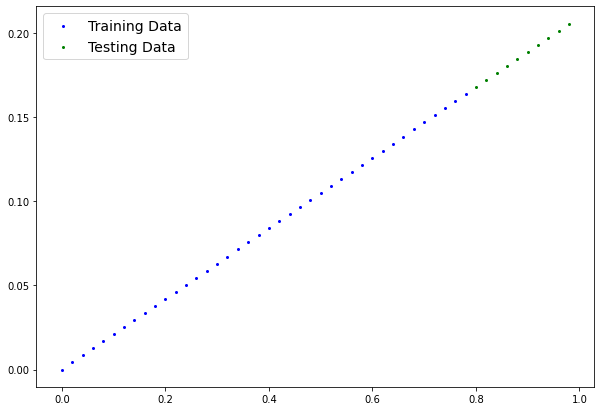

In [145]:
plot_predictions()

### Linear Regression Model

In [146]:
from torch import nn
# nn.Module is a basecalss building block
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [147]:
torch.manual_seed(699)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.5463], requires_grad=True), Parameter containing:
 tensor([0.2054], requires_grad=True)]

In [148]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.6425],
        [0.6534],
        [0.6643],
        [0.6753],
        [0.6862],
        [0.6971],
        [0.7080],
        [0.7190],
        [0.7299],
        [0.7408]])


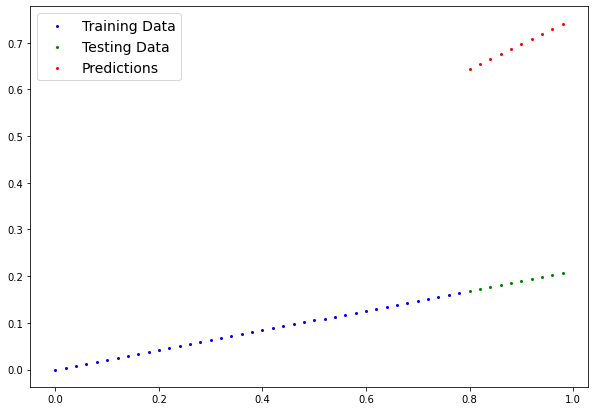

In [149]:
plot_predictions(predictions=y_preds)

Predictions are way off because we have not implemented a loss function and optimizer to get our predicted data to be more alike our test data

**Loss Function:** a function to measure how wrong your model's predictios are to the ideal outputs, lower is better,

**Optimizer Function:** Tells your model how to update its internal parameters to best lower the loss.

PyTorch training loop
For the training loop, we'll build the following steps:

Number	Step name	What does it do?	Code example
___
1	Forward pass The model goes through all of the training data once, performing its forward() function calculations.	model(x_train)
2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_train)
3	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	optimizer.zero_grad()
4	Perform backpropagation on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	loss.backward()
5	Update the optimizer (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	optimizer.step()

In [150]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [151]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
next(model_0.parameters()).device
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_0.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_0.parameters()).device

cuda


device(type='cuda', index=0)

In [152]:
torch.manual_seed(43)
epochs = 1169
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#track changes
train_loss_values=[]
test_loss_values = []
epoch_count = []
test_preds = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))
    test_preds.append(test_pred)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().cpu().numpy())
      test_loss_values.append(test_loss.detach().cpu().numpy())
      print(f"Epoch: {epoch}")
      print(f"MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0
MAE Train Loss: 0.3365750014781952 | MAE Test Loss: 0.37003836035728455 
Epoch: 10
MAE Train Loss: 0.02034934051334858 | MAE Test Loss: 0.03315434604883194 
Epoch: 20
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 30
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 40
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 50
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 60
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 70
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 80
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 90
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 100
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Epoch: 110
MAE Train Loss: 0.07091598957777023 | MAE Test Loss: 0.0246706735342741 
Ep

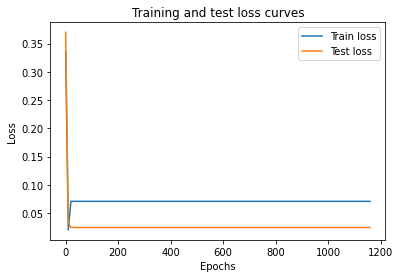

In [153]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

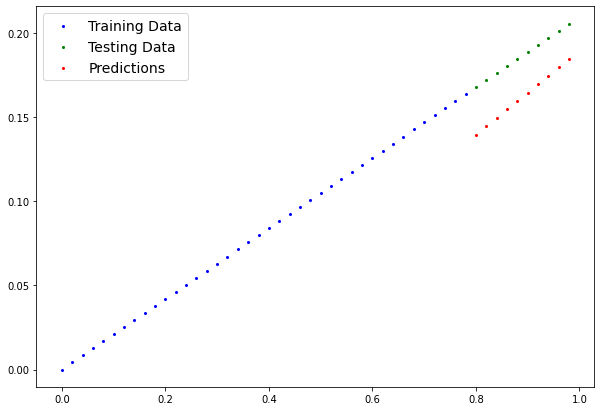

In [154]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

  plot_predictions(predictions=y_preds.cpu())

In [155]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [156]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [160]:
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test.cpu())

In [162]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds.cpu() == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])